<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone: Data Science Salary 2024 | Minh Hai Tran_part 3</h1></div>
<div style="position:relative; float:right">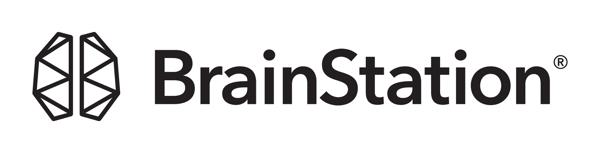
</div>
</div>

-----------------------------------
## Date March 2024
## MODELLING 

# Introduction

In the dynamic field of data science, understanding salary trends is crucial for professionals and organizations. This dataset provides insights into Data Science Salaries from 2020 to 2024, offering valuable information on trends, regional variations, and factors influencing compensation for data enthusiasts, researchers, and industry professionals.

# Impact
This project is anticipated to bring tangible benefits to both society and businesses. By leveraging advanced technology, the aim is to assist companies in setting salaries more effectively, thereby increasing employee satisfaction and reducing turnover rates. This could potentially save businesses expenses associated with hiring and training new staff. Additionally, by streamlining the salary negotiation process, both employees and companies can save valuable time. Moreover, offering fair and competitive pay can help companies attract top talent, giving them a competitive edge in the market. In essence, the project aims to enhance the salary determination process for all stakeholders involvd

# About data
The primary dataset was multiple datasets sourced from ai-jobs.net and kaggle, consisting 9,476 rows and 11 columns as data Dictionary below.

#### Data Dictionary


| Column Name       | Description                                                                                                        |
|-------------------|--------------------------------------------------------------------------------------------------------------------|
| work_year         | The year when the salary was paid.                                                                                 |
| experience_level  | The job experience level categorized as follows: EN (Entry-level / Junior), MI (Mid-level / Intermediate), SE (Senior-level / Expert), EX (Executive-level / Director). |
| employment_type   | Type of employment for the role: PT (Part-time), FT (Full-time), CT (Contract), FL (Freelance).                  |
| job_title         | The role held during the year.                                                                                     |
| salary            | Total gross salary amount paid.                                                                                    |
| salary_currency   | Currency of the salary paid as an ISO 4217 currency code.                                                          |
| salary_in_usd     | Salary converted to USD using statistical data from the BIS and central banks.                                      |
| employee_residence| Employee's primary country of residence during the work year as an ISO 3166 country code.                          |
| remote_ratio      | The percentage of work done remotely, categorized as: 0 (No remote work), 50 (Partially remote/hybrid), 100 (Fully remote).|
| company_location  | Country of the employer's main office or contracting branch as an ISO 3166 country code.                          |
| company_size      | The average number of employees in the company, categorized as: S (Less than 50 employees), M (50 to 250 employees), L (More than 250 employees).  |



___

### Table of content:
#### Part 1: Preprocessing
- 1.1: Engineering features
- 1.2: Target column
#### Part 2: Basic models-Linear regression
- 2.1: Linear Regression (Ordinary Least Square (OLS) Linear Regression)
- 2.2: Modified Linear Regression (by Ridge)
#### Part 3: Advanced models - GridSearchCV
- 3.1: Random Forest Regressor- 3.2: Gradient Boost Regressor
- 3.3: Exreme Gradient Boost Regressor
#### Part 4: Logistic regression
- 4.1: Basic model
- 4.2: Advanced logistic regression (pipeline)
- 4.3: Advanced logistic regression (CSV)
- 4.4: Advanced logistic regression (optimal parameter)
#### Part 5: Conclusion
-
---

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

# label encoders
from sklearn.preprocessing import LabelEncoder

# Convert contries
import country_converter as coco

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# Perform target encoding using category_encoders library
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# To build a regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To use Ridge or Lasso with linear regression 
from sklearn.linear_model import Ridge, Lasso


# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

### Par 1: Preprocessing

#### 1.1: Engineering features

In [2]:
# Loading dataset
df = pd.read_csv('dataset_new/cleaned_merged_df.csv')

# The info of dataset
df.info()

# sample of data
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9476 non-null   int64 
 1   experience_level    9476 non-null   object
 2   employment_type     9476 non-null   object
 3   job_title           9476 non-null   object
 4   salary              9476 non-null   int64 
 5   salary_currency     9476 non-null   object
 6   salary_in_usd       9476 non-null   int64 
 7   employee_residence  9476 non-null   object
 8   remote_ratio        9476 non-null   int64 
 9   company_location    9476 non-null   object
 10  company_size        9476 non-null   object
dtypes: int64(4), object(7)
memory usage: 814.5+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7640,2022,SE,FT,Data Engineer,194000,USD,194000,US,100,US,M


In [3]:
# Check the dupplicated and null data again

# Check for missing values
print(f' Null data: {df.isna().sum()}')

# check duplicate column
print(f' there is {df.T.duplicated().sum()} duplicated colum')

## check duplicates row
print(f' there is {df.duplicated().sum()} duplicated row')

 Null data: work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
 there is 0 duplicated colum
 there is 0 duplicated row


#### Drop redundancy columns
This is the clean data from part 1. Now we will preprocess data before modelling process. Considering the target column is salary_in_usd, we will drop the similar columns of salary_curency and salary (in different currencies). 

In [4]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)
df.sample()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
6406,2023,SE,FT,Data Engineer,275300,US,100,US,M


#### Drop high correlation collums
We can see there are 2 columns with similar indicate values that are employee_residence and company_location, we will consider their correlation to see if we need to drop one. 

In [5]:
# Initialize label encoders
le_residence = LabelEncoder()
le_location = LabelEncoder()

#create a new data frame to check the correlation matrix of 2 collumns employee_residence and company_location
df_copy=df.copy()

# Fit and transform the categories to numbers
df_copy['employee_residence_encoded'] = le_residence.fit_transform(df_copy['employee_residence'])
df_copy['company_location_encoded'] = le_location.fit_transform(df_copy['company_location'])

# Now you can calculate the correlation between the encoded columns
correlation_matrix = df_copy[['employee_residence_encoded', 'company_location_encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)

                            employee_residence_encoded  \
employee_residence_encoded                    1.000000   
company_location_encoded                      0.971909   

                            company_location_encoded  
employee_residence_encoded                  0.971909  
company_location_encoded                    1.000000  


The correlation matrix show the employee_residence and company_location have a high correlation value so we will drop company_location in the dataframe

In [6]:
# drop the company_location
df.drop(columns=['company_location'], inplace=True)

# check the cleaned data again
df.sample()



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
6540,2023,MI,FT,AWS Data Architect,258000,US,100,L


#### Group employee residence

By the way, let check how many unique value in the column of employee_residence.

In [7]:
print (df["employee_residence"].nunique())

91


As there are 91 unique value in employee residence so for better modelling training we will use the "pycountry-convert" package to help us group the countries as continents.

In [8]:
countries = df["employee_residence"].unique()
print(countries)

['GB' 'US' 'CA' 'LT' 'PL' 'FR' 'DE' 'SA' 'IN' 'AU' 'AE' 'UA' 'NL' 'EG'
 'AT' 'ES' 'PH' 'FI' 'TR' 'CH' 'OM' 'NZ' 'MX' 'PT' 'BA' 'BR' 'AR' 'LV'
 'ZA' 'IT' 'IE' 'EE' 'MT' 'HR' 'LB' 'RO' 'HU' 'VN' 'NG' 'CZ' 'PK' 'UG'
 'CO' 'SI' 'GR' 'MU' 'AM' 'TH' 'KR' 'QA' 'RU' 'KE' 'TN' 'GH' 'BE' 'AD'
 'EC' 'PE' 'MD' 'NO' 'UZ' 'GE' 'JP' 'HK' 'CF' 'IL' 'SG' 'SE' 'KW' 'CY'
 'IR' 'AS' 'CN' 'CR' 'CL' 'PR' 'DK' 'BO' 'DO' 'ID' 'MY' 'HN' 'DZ' 'IQ'
 'BG' 'JE' 'RS' 'LU' 'MK' 'MA' 'SK']


In [13]:
import pycountry_convert as pc

# Function to get continent name from country alpha-2 code
def country_to_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None  # For countries not found or any error

# Apply the function to create a new column 'employee_continent'
df['employee_continent'] = df['employee_residence'].apply(country_to_continent)

# let see how are they distribution
employee_continent_distribution = df['employee_continent'].value_counts()
print(employee_continent_distribution)


employee_continent
North America    8005
Europe           1102
Asia              193
South America      64
Africa             57
Oceania            55
Name: count, dtype: int64


In [16]:
# Drop 'employee_residence' column
df.drop(columns=['employee_residence'], inplace=True)

# check the cleaned data again
df.sample()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,employee_continent
897,2024,MI,FT,Data Engineer,166000,0,M,North America


#### Group job title
The dataframe seems ok now. However, there are quite random job_title, we need to preprocess it a little bit. 

Let check how many unique value in job_title column

In [17]:
unique_job_titles_count = len(df['job_title'].unique())
print(unique_job_titles_count)

156


156 job_title for IT jobs is a lot. For better modelling training we need to group it to smaller groups.

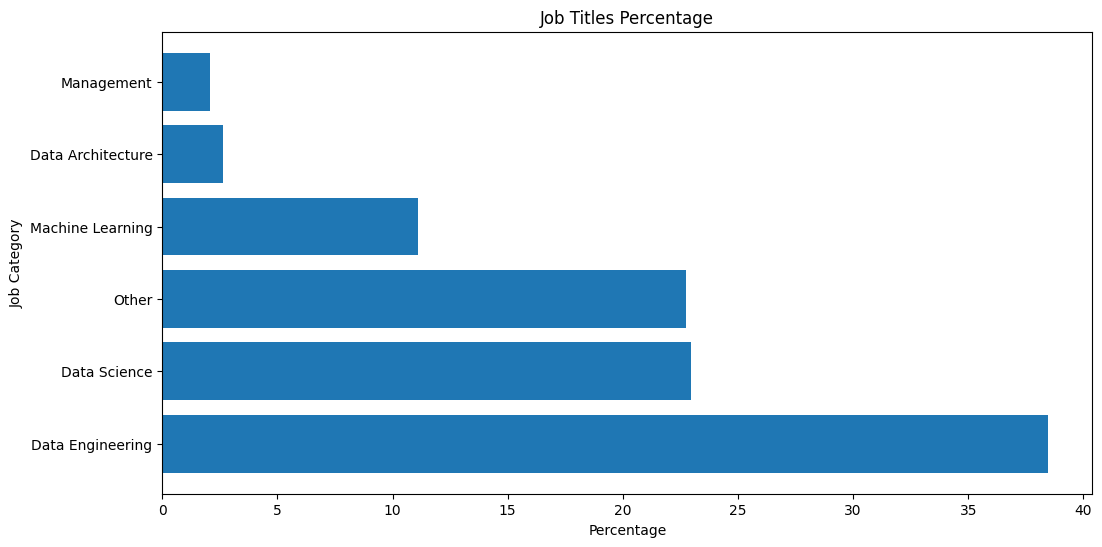

In [18]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)
# job categories
value_counts = df['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

In [19]:
# drop the job_title
df.drop(columns=['job_title'], inplace=True)

# check the data again
df.sample()



,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,employee_continent,job_category
3318,2023,MI,FT,80000,100,M,North America,Data Engineering


We will use job_category instead job_title. The engineering features are ready for modelling now.

#### 1.2. Target column

Let see the contribution and the variable of the target column of salary_in_usd

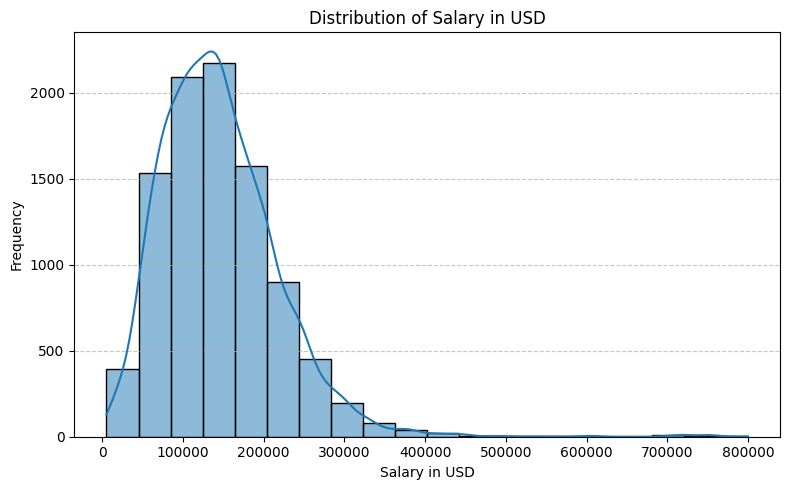

<Axes: xlabel='salary_in_usd'>

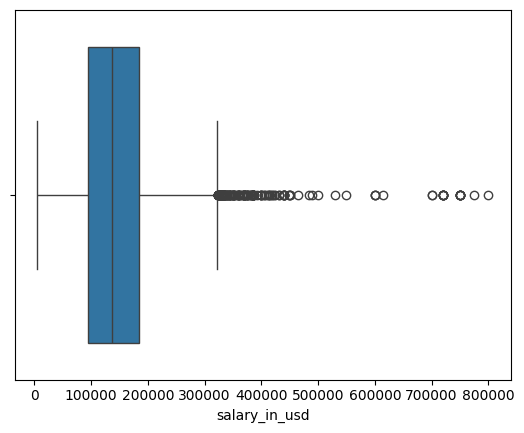

In [20]:
# Histogram of distribution
plt.figure(figsize=(8, 5))
sns.histplot(df, x='salary_in_usd', bins=20, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Exploring the outlier
sns.boxplot(x=df['salary_in_usd'])


The target column is quite left skewed with high variable on the right side. We will use log transformation to help balance the distribution.

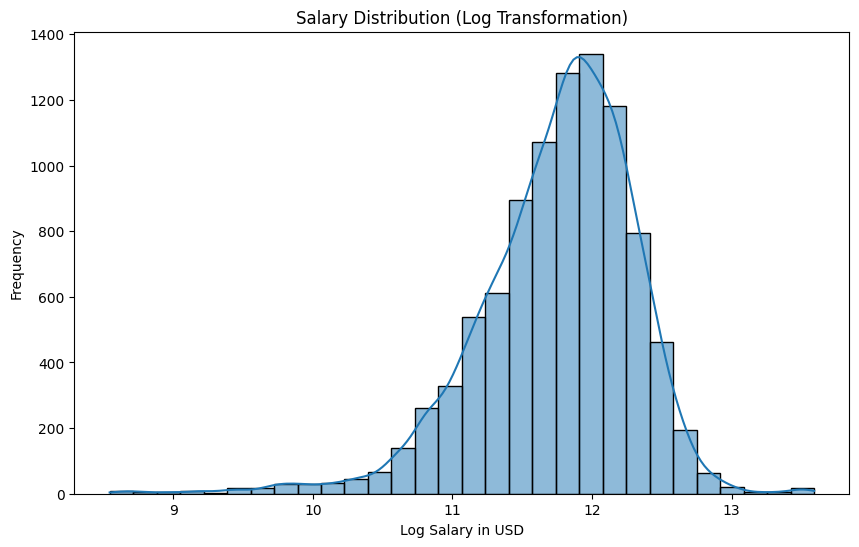

<Axes: xlabel='log_salary'>

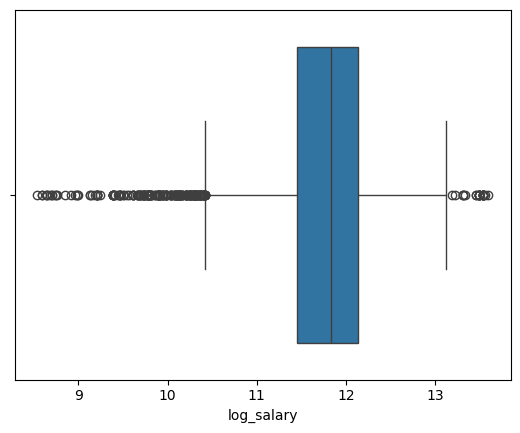

In [21]:
# Apply log transformation to salary_in_usd column
df['log_salary'] = np.log(df['salary_in_usd'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['log_salary'], bins=30, kde=True)
plt.title('Salary Distribution (Log Transformation)')
plt.xlabel('Log Salary in USD')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['log_salary'])

The new target column as log_salary is better distribution so we will use this instead of salary_in_usd.

In [22]:
# drop the salary_in_usd
df.drop(columns=['salary_in_usd'], inplace=True)

# check the data again
df.sample()


,work_year,experience_level,employment_type,remote_ratio,company_size,employee_continent,job_category,log_salary
1100,2024,SE,FT,0,M,North America,Data Science,12.048249


#### The all data including of engineering and target columns are now ready for the modelling process. Let's go!

### Part 2: Basic models-Linear regression

Firsly, we need to convert categorical data to dummy data before running model test

In [23]:
# Convert categorical columns to dummy variables
dummy_df = pd.get_dummies(df[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'employee_continent', 'job_category']], drop_first=True)

# Convert True/False values to 1/0
dummy_df = dummy_df.astype(int)

# Concatenate dummy variables with numerical columns
numerical_df = df[['work_year', 'log_salary']]
df_new = pd.concat([numerical_df, dummy_df], axis=1)
df_new.sample()


,work_year,log_salary,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,...,employee_continent_Asia,employee_continent_Europe,employee_continent_North America,employee_continent_Oceania,employee_continent_South America,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other
2938,2023,11.608236,100,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


Let check the correlation matrix between them

In [24]:
# Calculate the correlation matrix
correlation_matrix = df_new.corr()

# Find correlations greater than 0.8 or smaller than -0.8
high_correlation_values = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Display the correlation values greater than 0.8 or smaller than -0.8
print(high_correlation_values)

                                  work_year  log_salary  remote_ratio  \
work_year                               1.0         NaN           NaN   
log_salary                              NaN         1.0           NaN   
remote_ratio                            NaN         NaN           1.0   
experience_level_EX                     NaN         NaN           NaN   
experience_level_MI                     NaN         NaN           NaN   
experience_level_SE                     NaN         NaN           NaN   
employment_type_FL                      NaN         NaN           NaN   
employment_type_FT                      NaN         NaN           NaN   
employment_type_PT                      NaN         NaN           NaN   
company_size_M                          NaN         NaN           NaN   
company_size_S                          NaN         NaN           NaN   
employee_continent_Asia                 NaN         NaN           NaN   
employee_continent_Europe               NaN        

The feature of employee_continent_Europe and employee_continent_North America have a correlation coefficient of -0.84625, indicating a strong negative correlation so we need to drop one of them to prevent the multicolinearity. As the data of North America is 8 times more than Europe so we will drop the column in Europe.

In [25]:
# drop the salary_in_usd
df_new.drop(columns=['employee_continent_Europe'], inplace=True)

# check the data again
df_new.sample()


,work_year,log_salary,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,employee_continent_Asia,employee_continent_North America,employee_continent_Oceania,employee_continent_South America,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other
8591,2021,11.918391,100,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0


### Part 2: Linear Regression

#### 2.1 Basic model (OLS)

Time to starting with basic linear regression

In [26]:
# Prepare the features (X) and target (y)
y = df_new['log_salary']
X = df_new.drop(columns=['log_salary'])

In [27]:
X.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,employee_continent_Asia,employee_continent_North America,employee_continent_Oceania,employee_continent_South America,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other
0,2024,100,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2024,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
2,2024,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,2024,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,2024,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the linear regression model
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the Test set Results
y_pred_ln = ln_model.predict(X_test)
y_train_pred = ln_model.predict(X_train)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_ln)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_ln)

# Print intercept and coefficients
intercept = ln_model.intercept_
print(f'Intercept: {intercept}')

coefficient = ln_model.coef_[0]
print(f'Coefficient: {coefficient}')

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

print(f"Linear regression train R^2 score: {ln_model.score(X_train, y_train)}")
print(f"Linear regression test R^2 score: {ln_model.score(X_test, y_test)}")


Intercept: -70.745399806639
Coefficient: 0.04026099238060058
Mean Absolute Error (MAE): 0.32797750263888337
Mean Squared Error (MSE): 0.18135684752153614
Linear regression train R^2 score: 0.4386556161292252
Linear regression test R^2 score: 0.42835211903569503


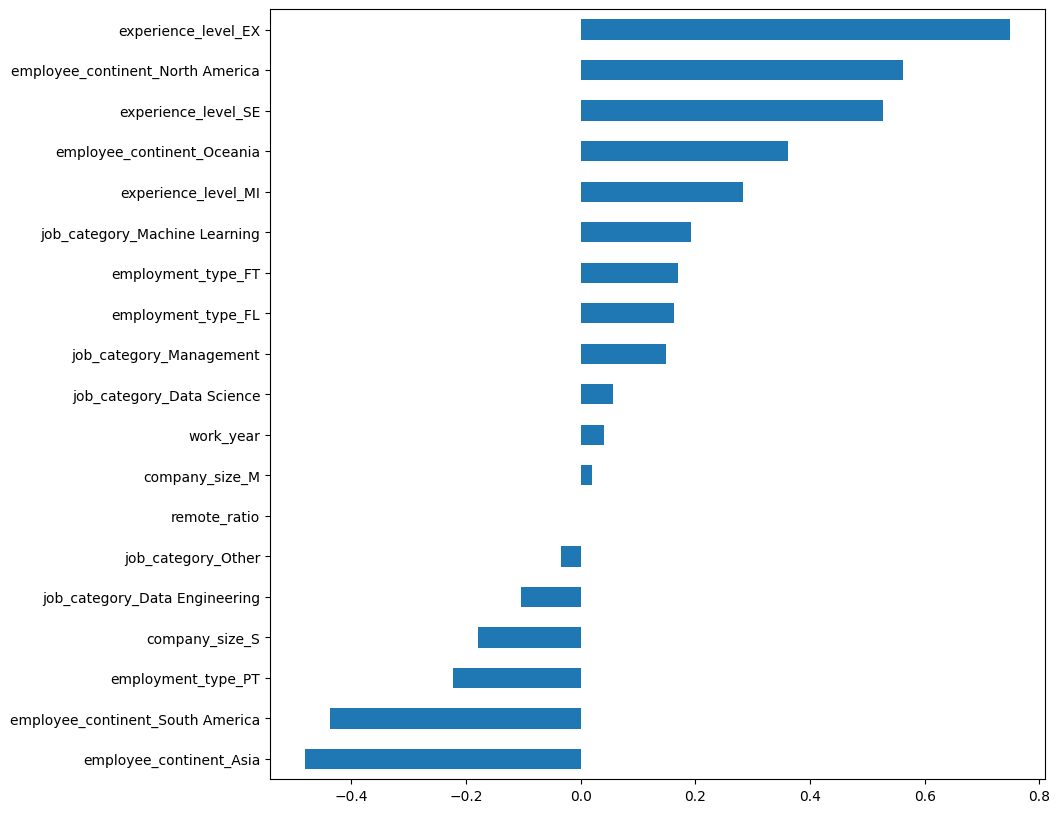

In [30]:
# Assuming ln_model.coef_ is a numpy array
coefficients = pd.Series(ln_model.coef_, index=X_train.columns)
sorted_coefficients = coefficients.sort_values(ascending=True)

plt.figure(figsize=(10, 10))
sorted_coefficients.plot(kind='barh')
plt.show()

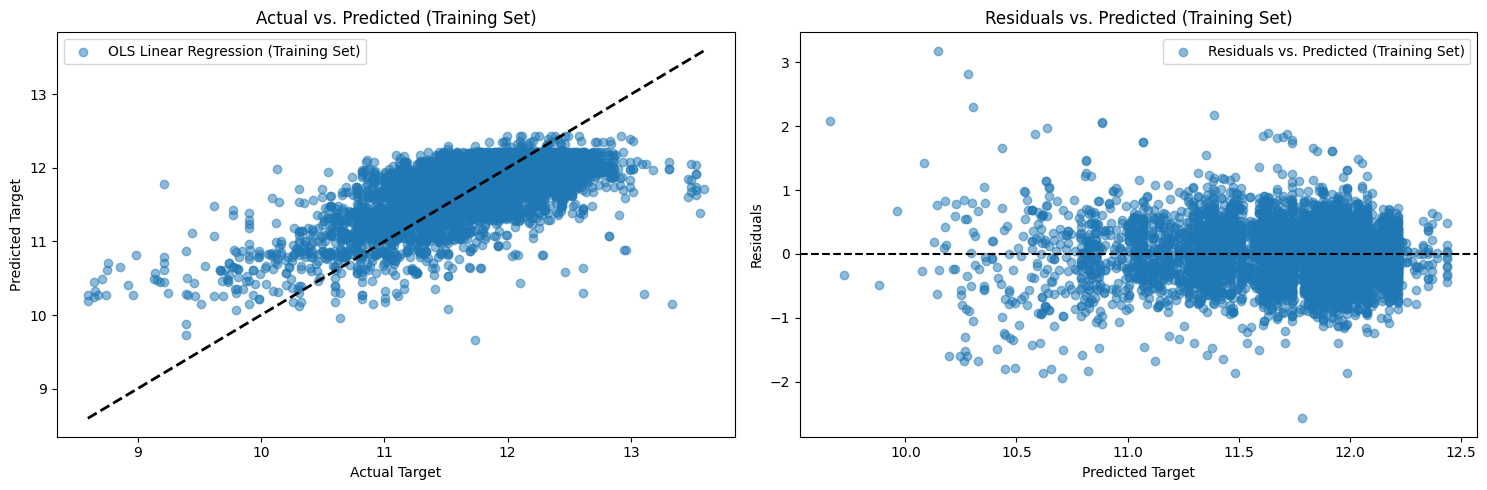

In [31]:
# Calculate residuals
residuals = y_train - y_train_pred

# Visualising the Training set results
plt.figure(figsize=(15, 5))  

plt.subplot(1, 2, 1)  
plt.scatter(y_train, y_train_pred, alpha=0.5, label='OLS Linear Regression (Training Set)')
plt.title("Actual vs. Predicted (Training Set)")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.legend()  

# Create subplot 2 with 1 row, 2 columns, and index 2
plt.subplot(1, 2, 2)  
plt.scatter(y_train_pred, residuals, alpha=0.5, label='Residuals vs. Predicted (Training Set)')
plt.title("Residuals vs. Predicted (Training Set)")
plt.xlabel("Predicted Target")
plt.ylabel("Residuals")
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()  

plt.tight_layout()  
plt.show()


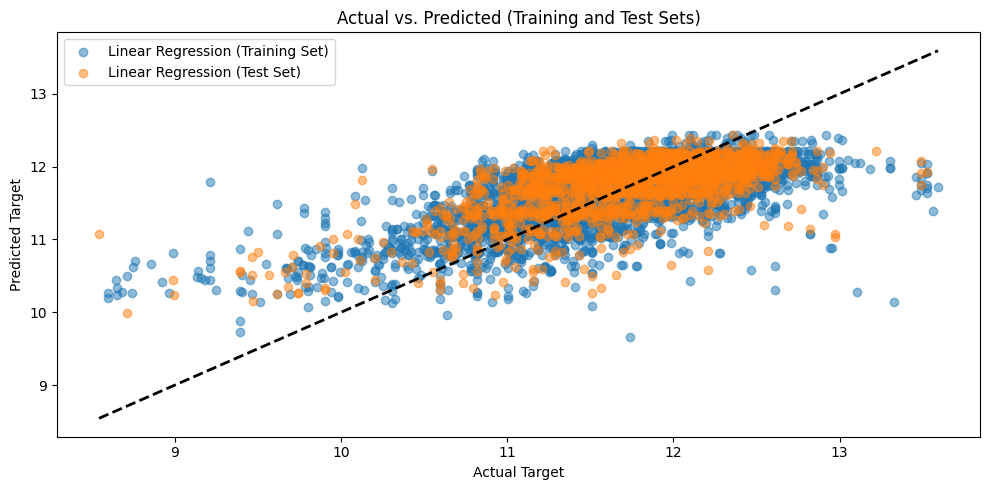

In [32]:
# Replace y_train_pred_xgb with your actual predicted values from LR model
y_train_pred = ln_model.predict(X_train)
y_test_pred = ln_model.predict(X_test)
# Calculate residuals for linear regression model

residuals = y_train - y_train_pred
# Visualise the model of train and test for OLS linear regressor
plt.figure(figsize=(10, 5))  # Set the figure size

# Plotting for training set
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Linear Regression (Training Set)')
# Plotting for test set
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Linear Regression (Test Set)')
plt.title("Actual vs. Predicted (Training and Test Sets)")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         'k--', lw=2)  # Diagonal line
plt.legend()  

plt.tight_layout()  
plt.show()


#### 2.2: Modified Linear Regression (By Pipeline, Scaler and Ridge)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ridge', Ridge(alpha=1.0))     # Apply ridge regularization
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE) for test set
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


R-squared (Train): 0.43865558503627333
R-squared (Test): 0.4283508036948289
Mean Absolute Error (MAE): 0.32797848065874446
Mean Squared Error (MSE): 0.18135726481700915


#### 2.3: Modified Linear Regression (By Pipeline, Scaler, Ridge and polynomial feature)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with scaling, polynomial features, and Ridge regularization
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Standardize features
    ('poly', PolynomialFeatures()),      # Create polynomial features
    ('ridge', Ridge(alpha=1.0))           # Apply Ridge regularization
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Train R-squared: 0.4742082868436177
Test R-squared: 0.39669418590330463
Mean Absolute Error (MAE): 0.3320638922424334
Mean Squared Error (MSE): 0.19140041305046426


### Part 3: Advanced models - GridSearchCV

In [35]:
# Prepare the features (X) and target (y)
y = df_new['log_salary']
X = df_new.drop(columns=['log_salary'])

#### 3.1: Random Forest Regressor


In [36]:
# training the random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
#Predicting the Test set Results
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


print(f"Random Forest regressor train r2 score: {rf_model.score(X_train, y_train)}")
print(f"Random Forest regressor test r2 score: {rf_model.score(X_test, y_test)}")


Mean Absolute Error (MAE): 0.32562023459318457
Mean Squared Error (MSE): 0.18582694282190584
Random Forest regressor train r2 score: 0.5515852687188122
Random Forest regressor test r2 score: 0.4142621051151487


#### Modified parameters for random forest model

In [51]:
#Separating our data into train and test data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tempfile import mkdtemp

#Instantiate the model
regr = RandomForestRegressor(n_estimators=500) # setting max features is not needed here as our dataset only has 2 features.

estimators = [   ('regr', RandomForestRegressor())]

pipe = Pipeline(estimators)

params = {'regr__n_estimators': [500],
           'regr__max_depth': [15, 20],
          'regr__max_features': [30]
         } #The nore the better

grid_search = GridSearchCV(pipe, param_grid=params,cv=5, verbose=4)

fittedgridrf = grid_search.fit(X_train, y_train)

# Evaluate the model

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
#Examine the train and test scores
print(f'The train R2 score: {fittedgridrf.score(X_train, y_train)}')
print(f'The test R2 score: {fittedgridrf.score(X_test, y_test)}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.399 total time=   3.4s
[CV 2/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.407 total time=   3.3s
[CV 3/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.418 total time=   3.9s
[CV 4/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.430 total time=   4.0s
[CV 5/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.408 total time=   3.7s
[CV 1/5] END regr__max_depth=20, regr__max_features=30, regr__n_estimators=500;, score=0.397 total time=   3.8s
[CV 2/5] END regr__max_depth=20, regr__max_features=30, regr__n_estimators=500;, score=0.406 total time=   3.8s
[CV 3/5] END regr__max_depth=20, regr__max_features=30, regr__n_estimators=500;, score=0.417 total time=   3.3s
[CV 4/5] END regr__max_depth=20, regr__max_f

In [39]:
pd.DataFrame(fittedgridrf.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__max_depth,param_regr__max_features,param_regr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,2.890494,0.072813,0.108197,0.014844,20,30,500,"{'regr__max_depth': 20, 'regr__max_features': ...",0.397897,0.408561,0.418001,0.432323,0.409790,0.413314,0.011454,1
0,2.821765,0.151910,0.114514,0.012148,15,30,500,"{'regr__max_depth': 15, 'regr__max_features': ...",0.395932,0.407412,0.416829,0.430474,0.407095,0.411548,0.011549,2


In [52]:
#Instantiate the model
regr = RandomForestRegressor(n_estimators=500)
estimators = [   ('regr', RandomForestRegressor())]

pipe = Pipeline(estimators)

params = {
    'regr__n_estimators': [100,1000],  # Try different values for the number of estimators
    'regr__max_depth': [5, 15],     # Try different values for the maximum depth of the trees
    'regr__max_features': [30]  # Try different values for the maximum number of features
}

grid_search = GridSearchCV(pipe, param_grid=params,cv=5, verbose=4)

fittedgridrf = grid_search.fit(X_train, y_train)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

#Examine the train and test scores
print(f'The train R2 score: {fittedgridrf.score(X_train, y_train)}')
print(f'The test R2 score: {fittedgridrf.score(X_test, y_test)}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=100;, score=0.397 total time=   0.4s
[CV 2/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=100;, score=0.407 total time=   0.4s
[CV 3/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=100;, score=0.408 total time=   0.5s
[CV 4/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=100;, score=0.447 total time=   0.4s
[CV 5/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=100;, score=0.421 total time=   0.3s
[CV 1/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=1000;, score=0.397 total time=   4.8s
[CV 2/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=1000;, score=0.407 total time=   4.4s
[CV 3/5] END regr__max_depth=5, regr__max_features=30, regr__n_estimators=1000;, score=0.409 total time=   4.4s
[CV 4/5] END regr__max_depth=5, regr__max_feature

In [53]:
pd.DataFrame(fittedgridrf.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__max_depth,param_regr__max_features,param_regr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,4.470713,0.161396,0.135841,0.021521,5,30,1000,"{'regr__max_depth': 5, 'regr__max_features': 3...",0.397116,0.407333,0.409040,0.448587,0.424883,0.417392,0.017951,1
0,0.485702,0.063892,0.020259,0.002314,5,30,100,"{'regr__max_depth': 5, 'regr__max_features': 3...",0.396680,0.406718,0.407941,0.447427,0.420639,0.415881,0.017513,2
3,7.621439,0.470491,0.344754,0.086568,15,30,1000,"{'regr__max_depth': 15, 'regr__max_features': ...",0.397164,0.407415,0.416476,0.431884,0.408926,0.412373,0.011535,3
2,0.659942,0.034828,0.032092,0.004473,15,30,100,"{'regr__max_depth': 15, 'regr__max_features': ...",0.397719,0.397218,0.415484,0.429231,0.411121,0.410155,0.011960,4


After playing around params, the maximum of R2 score values for radom forest model is 0.55 (for train) and 0.42(for test).

#### 3.2: Gradient Boost Regressor


In [54]:
# training the Gradient Boost regressor
from sklearn.ensemble import GradientBoostingRegressor
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [55]:
#Predicting the Test set Results
y_pred_GB = GB_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_GB)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_GB)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


print(f"Random Forest regressor train r2 score: {GB_model.score(X_train, y_train)}")
print(f"Random Forest regressor test r2 score: {GB_model.score(X_test, y_test)}")

Mean Absolute Error (MAE): 0.3269867994895781
Mean Squared Error (MSE): 0.17998544228799204
Random Forest regressor train r2 score: 0.4669467824390463
Random Forest regressor test r2 score: 0.43267487225076595


#### modified parameters to for XGBoost model: Gradient Boost Regressor

In [56]:
#Separating our data into train and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
#To cross-validate
from sklearn.model_selection import cross_val_score
import numpy as np

#Instantiate the model
regr = GradientBoostingRegressor(n_estimators=500) # setting max features is not needed here as our dataset only has 2 features.

estimators = [   ('regr', GradientBoostingRegressor())]

pipe = Pipeline(estimators)

params = {'regr__n_estimators': [500],
           'regr__max_depth': [15, 20],
          'regr__max_features': [30]
         } #The nore the better

grid_search = GridSearchCV(pipe, param_grid=params,cv=5, verbose=4)

fittedgridgb = grid_search.fit(X_train, y_train)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

#Examine the train and test scores
print(f'The train R2 score: {fittedgridgb.score(X_train, y_train)}')
print(f'The test R2 score: {fittedgridgb.score(X_test, y_test)}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.349 total time=   6.5s
[CV 2/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.329 total time=   6.1s
[CV 3/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.311 total time=   5.3s
[CV 4/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.365 total time=   5.6s
[CV 5/5] END regr__max_depth=15, regr__max_features=30, regr__n_estimators=500;, score=0.319 total time=   4.6s
[CV 1/5] END regr__max_depth=20, regr__max_features=30, regr__n_estimators=500;, score=0.346 total time=   4.6s
[CV 2/5] END regr__max_depth=20, regr__max_features=30, regr__n_estimators=500;, score=0.323 total time=   4.9s
[CV 3/5] END regr__max_depth=20, regr__max_features=30, regr__n_estimators=500;, score=0.304 total time=   4.2s
[CV 4/5] END regr__max_depth=20, regr__max_f

In [57]:
pd.DataFrame(fittedgridrf.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__max_depth,param_regr__max_features,param_regr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,4.470713,0.161396,0.135841,0.021521,5,30,1000,"{'regr__max_depth': 5, 'regr__max_features': 3...",0.397116,0.407333,0.409040,0.448587,0.424883,0.417392,0.017951,1
0,0.485702,0.063892,0.020259,0.002314,5,30,100,"{'regr__max_depth': 5, 'regr__max_features': 3...",0.396680,0.406718,0.407941,0.447427,0.420639,0.415881,0.017513,2
3,7.621439,0.470491,0.344754,0.086568,15,30,1000,"{'regr__max_depth': 15, 'regr__max_features': ...",0.397164,0.407415,0.416476,0.431884,0.408926,0.412373,0.011535,3
2,0.659942,0.034828,0.032092,0.004473,15,30,100,"{'regr__max_depth': 15, 'regr__max_features': ...",0.397719,0.397218,0.415484,0.429231,0.411121,0.410155,0.011960,4


#### 3.3: Exreme Gradient Boost Regressor

In [58]:
# Train the XGBoost regressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
#Predicting the Test set Results
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_xgb)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_xgb)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


print(f"Random Forest regressor train r2 score: {xgb_model.score(X_train, y_train)}")
print(f"Random Forest regressor test r2 score: {xgb_model.score(X_test, y_test)}")


Mean Absolute Error (MAE): 0.32896619825090617
Mean Squared Error (MSE): 0.19286744839391562
Random Forest regressor train r2 score: 0.5489038000812271
Random Forest regressor test r2 score: 0.39207000073001463


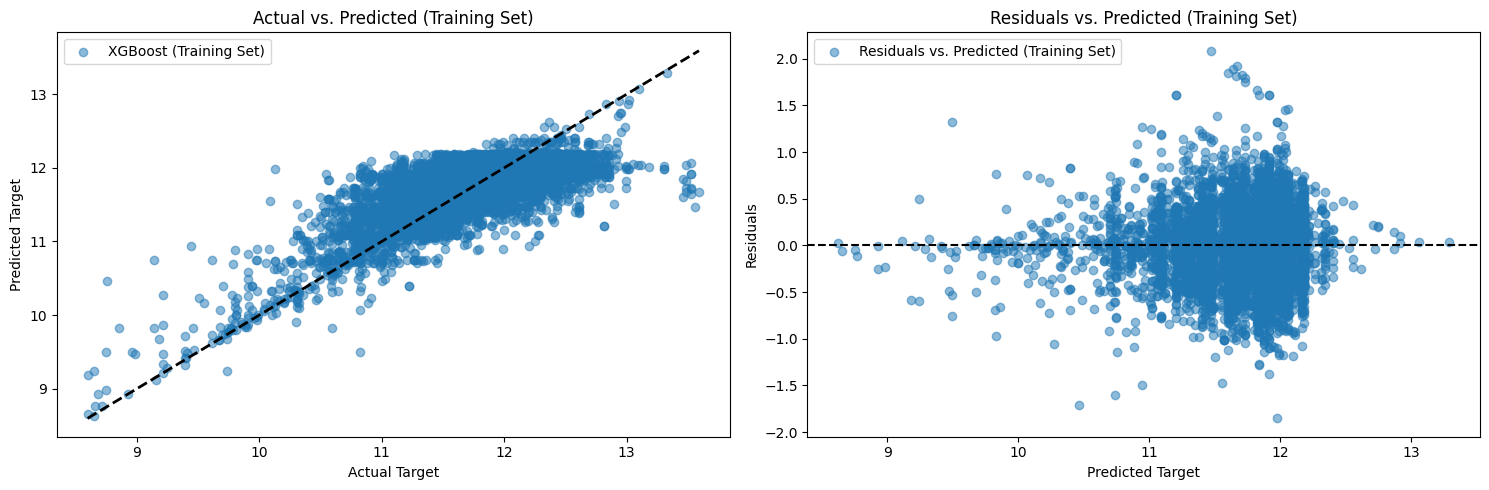

In [60]:
# Visualize the model of train and test
# Replace y_train_pred_xgb with your actual predicted values from XGBoost model
y_train_pred_xgb = xgb_model.predict(X_train)
# Calculate residuals for XGBoost model
residuals_xgb = y_train - y_train_pred_xgb

# Visualising the Training set results for XGBoost model
plt.figure(figsize=(15, 5))  # Set the figure size
plt.subplot(1, 2, 1)  # Create subplot 1 with 1 row, 2 columns, and index 1
plt.scatter(y_train, y_train_pred_xgb, alpha=0.5, label='XGBoost (Training Set)')
plt.title("Actual vs. Predicted (Training Set)")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.legend()  # Add legend

# Visualising the residuals of XGBoost model
plt.subplot(1, 2, 2)  # Create subplot 2 with 1 row, 2 columns, and index 2
plt.scatter(y_train_pred_xgb, residuals_xgb, alpha=0.5, label='Residuals vs. Predicted (Training Set)')
plt.title("Residuals vs. Predicted (Training Set)")
plt.xlabel("Predicted Target")
plt.ylabel("Residuals")
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()  # Add legend

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


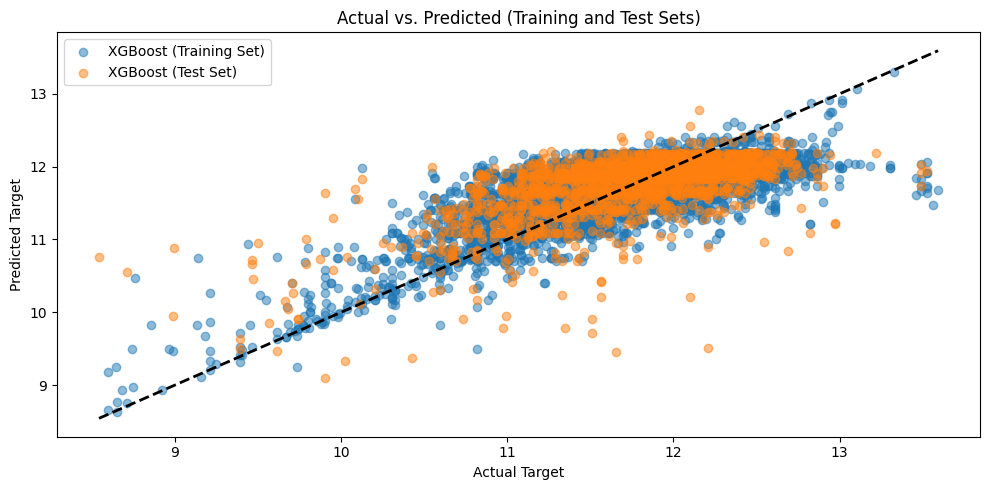

In [61]:
# Visualize the model of train and test
# Replace y_train_pred_xgb with your actual predicted values from XGBoost model
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Visualise the model of train and test for XGBoost
plt.figure(figsize=(10, 5))  # Set the figure size

# Plotting for training set
plt.scatter(y_train, y_train_pred_xgb, alpha=0.5, label='XGBoost (Training Set)')
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5, label='XGBoost (Test Set)')
plt.title("Actual vs. Predicted (Training and Test Sets)")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         'k--', lw=2)  # Diagonal line
plt.legend()  

plt.tight_layout()  
plt.show()


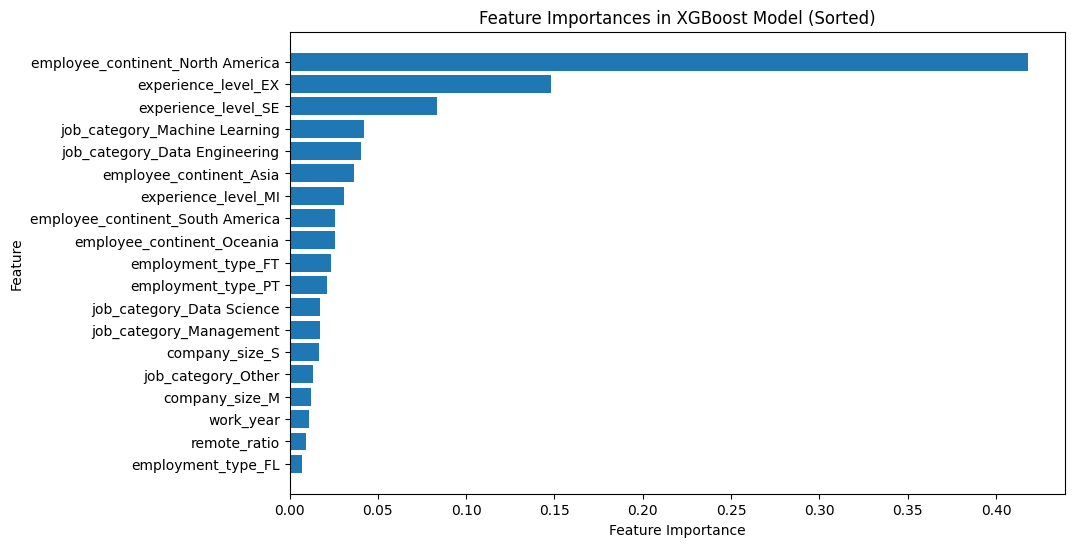

In [62]:
# Access feature importances
feature_importances = xgb_model.feature_importances_

# Pair feature names with their importances
feature_importance_pairs = [(feature, importance) for feature, importance in zip(X_train.columns, feature_importances)]

# Sort feature importance pairs based on importances (in descending order)
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=False)

# Extract sorted feature names and importances
sorted_features = [pair[0] for pair in sorted_feature_importance_pairs]
sorted_importances = [pair[1] for pair in sorted_feature_importance_pairs]

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost Model (Sorted)')
plt.show()


#### modified parameters to for XGBoost model:

In [111]:
#Instantiate the model
regr = XGBRegressor(n_estimators=500) # setting max features is not needed here as our dataset only has 2 features.

estimators = [   ('regr', XGBRegressor())]

pipe = Pipeline(estimators)

params = {'regr__n_estimators': [500],
           'regr__max_depth': [5, 10],
          'regr__max_features': [100]
         } #The nore the better

grid_search = GridSearchCV(pipe, param_grid=params,cv=5, verbose=4)

fittedgridxgb = grid_search.fit(X_train, y_train)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_xgb)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_xgb)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

#Examine the train and test scores
print(f'The train R2 score: {fittedgridxgb.score(X_train, y_train)}')
print(f'The test R2 score: {fittedgridxgb.score(X_test, y_test)}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END regr__max_depth=5, regr__max_features=100, regr__n_estimators=500;, score=0.295 total time=   0.3s
[CV 2/5] END regr__max_depth=5, regr__max_features=100, regr__n_estimators=500;, score=0.269 total time=   0.2s
[CV 3/5] END regr__max_depth=5, regr__max_features=100, regr__n_estimators=500;, score=0.290 total time=   0.2s
[CV 4/5] END regr__max_depth=5, regr__max_features=100, regr__n_estimators=500;, score=0.302 total time=   0.2s
[CV 5/5] END regr__max_depth=5, regr__max_features=100, regr__n_estimators=500;, score=0.256 total time=   0.2s
[CV 1/5] END regr__max_depth=10, regr__max_features=100, regr__n_estimators=500;, score=0.286 total time=   0.1s
[CV 2/5] END regr__max_depth=10, regr__max_features=100, regr__n_estimators=500;, score=0.267 total time=   0.2s
[CV 3/5] END regr__max_depth=10, regr__max_features=100, regr__n_estimators=500;, score=0.295 total time=   0.1s
[CV 4/5] END regr__max_depth=10, regr__ma

In [67]:
pd.DataFrame(fittedgridxgb.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__max_depth,param_regr__max_features,param_regr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.278292,0.045839,0.006614,0.000597,10,100,500,"{'regr__max_depth': 10, 'regr__max_features': ...",0.383429,0.372752,0.351275,0.393616,0.372257,0.374666,0.014089,1
0,0.313459,0.039973,0.007241,0.000682,5,100,500,"{'regr__max_depth': 5, 'regr__max_features': 1...",0.372362,0.354733,0.348820,0.409140,0.356629,0.368337,0.021837,2


### Part 4: Logistic regression model

Before use logistic regression model, we need to convert the target column of "log_salary" to groups

In [73]:
df_newlr = df_new.copy()  # Creating a copy of df_new

# Setting values based on conditions
df_newlr['salary_category'] = 0  # Initialize the new column with default value 0

# Applying conditions using boolean masks
df_newlr.loc[df_newlr['log_salary'] <= 11.5, 'salary_category'] = 0
df_newlr.loc[(df_newlr['log_salary'] > 11.5) & (df_newlr['log_salary'] <= 12), 'salary_category'] = 1
df_newlr.loc[df_newlr['log_salary'] > 12., 'salary_category'] = 2
df_newlr.sample(5)

,work_year,log_salary,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,...,employee_continent_Asia,employee_continent_North America,employee_continent_Oceania,employee_continent_South America,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other,salary_category
444,2024,10.937561,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2122,2024,11.800605,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
7614,2022,11.695247,100,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
5522,2023,11.561716,0,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
9471,2020,8.711443,100,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


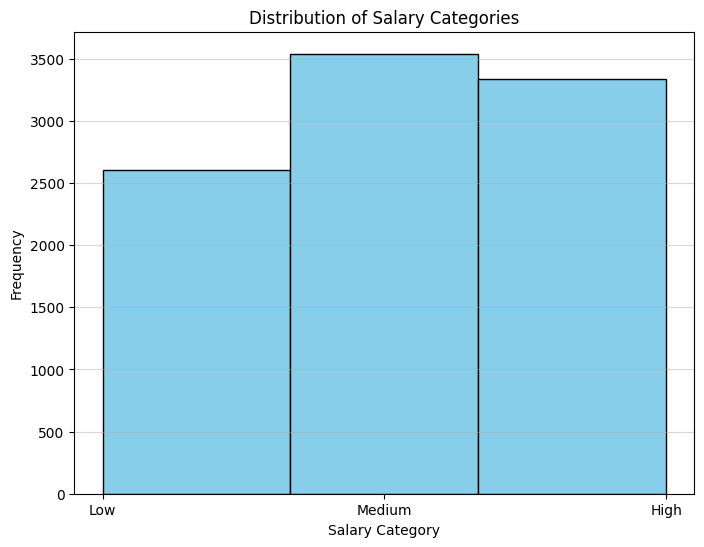

In [74]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_newlr['salary_category'], bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Salary Category')
plt.ylabel('Frequency')
plt.title('Distribution of Salary Categories')
plt.xticks(range(3), ['Low', 'Medium', 'High'])
plt.grid(axis='y', alpha=0.5)
plt.show()

In [75]:
# after create a new column of "salary_category" we will drop the column of log_salary
df_newlr.drop(columns=['log_salary'], inplace=True)

# check the cleaned data again
df_newlr.sample()


,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,employee_continent_Asia,employee_continent_North America,employee_continent_Oceania,employee_continent_South America,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other,salary_category
729,2024,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2


#### 4.1: Basic model

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate the logistic regression model
logistic_model = LogisticRegression()

In [79]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

y = df_newlr['salary_category']
X = df_newlr.drop(columns=['salary_category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

# Predicting the Test set Results
y_pred = lg_model.predict(X_test)

print(f"logistic regression train r2 score: {lg_model.score(X_train, y_train)}")
print(f"logistic regression test r2 score: {lg_model.score(X_test, y_test)}")

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Extract accuracy and F1 score from the classification report
classification_metrics = classification_report(y_test, y_pred, output_dict=True)
accuracy = classification_metrics['accuracy']
f1_score = classification_metrics['weighted avg']['f1-score']

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

print("Classification Report:")
print(report)


logistic regression train r2 score: 0.5393139841688654
logistic regression test r2 score: 0.5337552742616034
Accuracy: 0.5337552742616034
F1 Score: 0.5358674867984977
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.46      0.56       537
           1       0.44      0.52      0.48       702
           2       0.55      0.61      0.58       657

    accuracy                           0.53      1896
   macro avg       0.57      0.53      0.54      1896
weighted avg       0.55      0.53      0.54      1896



In [84]:

# Create logistic regression model with cross-validation
log_reg_cv = LogisticRegressionCV(cv=10)  # Specify the number of folds with cv parameter

# Perform cross-validation
scores = cross_val_score(log_reg_cv, X, y, cv=10)  # You can also specify cv here, if different from the model's default

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.52109705 0.53164557 0.50527426 0.53481013 0.52320675 0.55696203
 0.56599789 0.55015839 0.60190074 0.57866948]
Mean cross-validation score: 0.5469722285342565


The "Mean cross-validation score" represents the average accuracy obtained across all folds. In this example, the mean score of approximately 0.547 indicates that, on average, the logistic regression model achieves an accuracy of around 54.7% across the different subsets of the training data used in the cross-validation process. This metric serves as a robust estimate of the model's generalization performance. That seems really good. Let plot the matrix for it

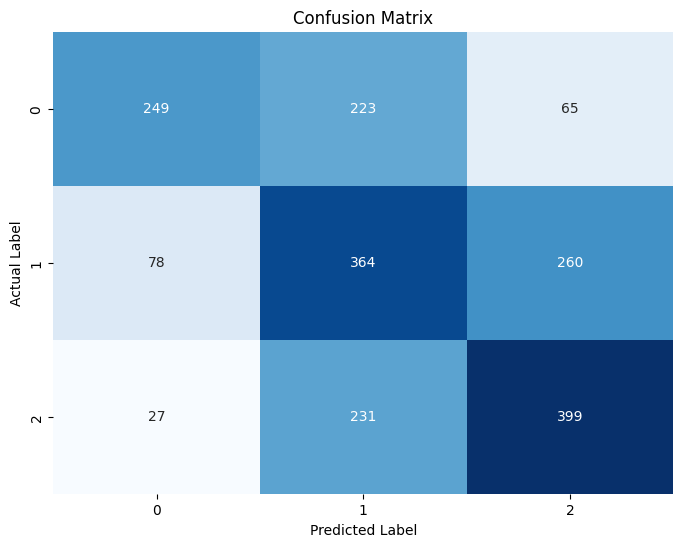

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0','1','2'],
            yticklabels=['0', '1','2'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


#### 4.2 Advanced model (GridSearchCV, pipeline)

In [93]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define preprocessing steps (e.g., scaling)
preprocessor = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
])

# Define the classifier
classifier = LogisticRegression()

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Define the hyperparameters to tune
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__solver': ['liblinear', 'lbfgs']  # Algorithm for optimization
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Print the best parameters
print("Best parameters found:")
print(grid_search.best_params_)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


# Calculate the classification report
report = classification_report(y_test, y_pred)

# Extract accuracy and F1 score from the classification report
classification_metrics = classification_report(y_test, y_pred, output_dict=True)
accuracy = classification_metrics['accuracy']
f1_score = classification_metrics['weighted avg']['f1-score']

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ......classifier__C=1, classifier__solver=liblinear; total time=   0.0s
[CV] END ......classifier__C=1, classifier__solve

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Separating our data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
estimators = [('regr', LogisticRegression())]
pipe = Pipeline(estimators)

params = {'regr__C': [0.6, 0.8, 1, 1.2]}  # Regularization parameter C

grid_search = GridSearchCV(pipe, param_grid=params, cv=5, verbose=4)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Print the best cross-validation score
print(f"The best cross-validation score: {grid_search.best_score_}")

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Extract accuracy and F1 score from the classification report
classification_metrics = classification_report(y_test, y_pred, output_dict=True)
accuracy = classification_metrics['accuracy']
f1_score = classification_metrics['weighted avg']['f1-score']

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .......................regr__C=0.6;, score=0.522 total time=   0.0s
[CV 2/5] END .......................regr__C=0.6;, score=0.533 total time=   0.0s
[CV 3/5] END .......................regr__C=0.6;, score=0.534 total time=   0.0s
[CV 4/5] END .......................regr__C=0.6;, score=0.544 total time=   0.0s
[CV 5/5] END .......................regr__C=0.6;, score=0.540 total time=   0.0s
[CV 1/5] END .......................regr__C=0.8;, score=0.530 total time=   0.0s
[CV 2/5] END .......................regr__C=0.8;, score=0.544 total time=   0.0s
[CV 3/5] END .......................regr__C=0.8;, score=0.541 total time=   0.0s
[CV 4/5] END .......................regr__C=0.8;, score=0.546 total time=   0.0s
[CV 5/5] END .......................regr__C=0.8;, score=0.540 total time=   0.0s
[CV 1/5] END .........................regr__C=1;, score=0.526 total time=   0.0s
[CV 2/5] END .........................regr__C=1;,

#### 4.3 : Advanced logistic regression model (combining with Pipeline, GridSearchCV, StandardScaler, PCA and XGBClassifier)

In [96]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

# Define preprocessing steps
preprocessor = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA())                 # Apply PCA
])

# Define the classifier
classifier = XGBClassifier()

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Define the hyperparameters to tune
param_grid = {
    'classifier__colsample_bytree': [0.6, 0.8],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__n_estimators': [100, 200],
    'classifier__subsample': [0.6, 0.8]
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Print the best parameters
print("Best parameters found:")
print(grid_search.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.6; total time=   0.3s
[CV] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.6; total time=   0.1s
[CV] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.6; total time=   0.1s
[CV] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.6; total time=   0.1s
[CV] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.6; total time=   0.1s
[CV] END classifier__colsample_bytree=0.6, classifier__lea

In [97]:
# Step 1: Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Step 2: Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Step 3: Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Extract accuracy and F1 score from the classification report
classification_metrics = classification_report(y_test, y_pred, output_dict=True)
accuracy = classification_metrics['accuracy']
f1_score = classification_metrics['weighted avg']['f1-score']

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

Best parameters found:
{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61       537
           1       0.46      0.53      0.49       702
           2       0.56      0.58      0.57       657

    accuracy                           0.55      1896
   macro avg       0.57      0.55      0.56      1896
weighted avg       0.56      0.55      0.55      1896

Accuracy: 0.5490506329113924
F1 Score: 0.5526284328779019


### Part 5: Conclusion

We have walked through several model with summary as below:

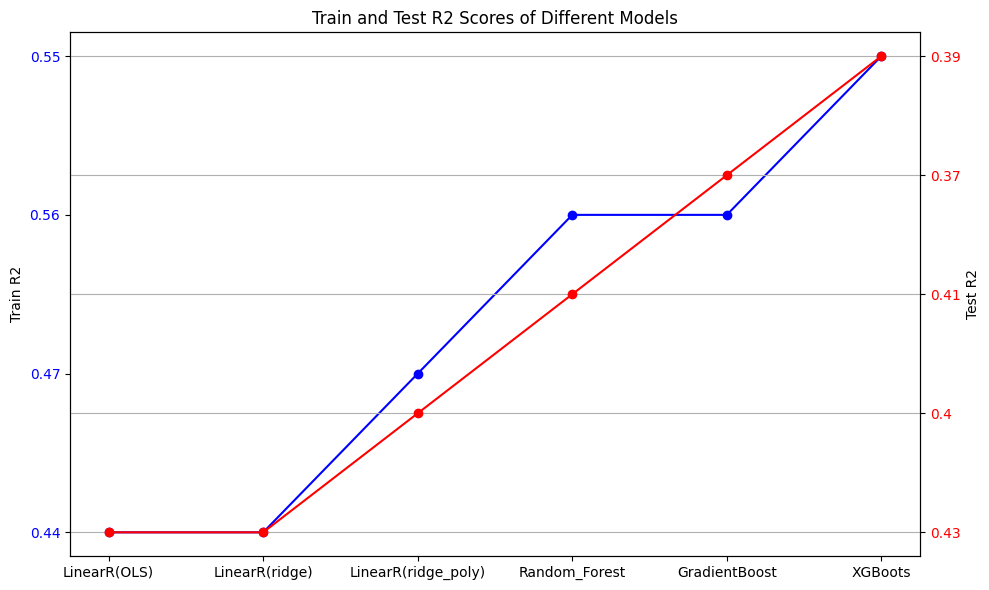

In [107]:
# Plot train and test r2 of linear regression, RF and XGBoots Models
Model = ['LinearR(OLS)', 'LinearR(ridge)','LinearR(ridge_poly)','Random_Forest','GradientBoost','XGBoots']
R2_train = ['0.44','0.44','0.47','0.56','0.56','0.55']
R2_test = ['0.43','0.43','0.4','0.41','0.37','0.39']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting first y-axis (Train R2)
ax1.plot(Model, R2_train, marker='o', color='blue', label='Train R2')
ax1.set_ylabel('Train R2')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating second y-axis for Test R2
ax2 = ax1.twinx()
ax2.plot(Model, R2_test, marker='o', color='red', label='Test R2')
ax2.set_ylabel('Test R2')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
plt.title('Train and Test R2 Scores of Different Models')
plt.xlabel('Model')
plt.xticks(rotation=0, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### XGBoost have the best model with R2 train  = 55% and R2 test 39%. The MAE and MSE are quite similar between all models.

#### For Logistic regression model, the accuracy is 53% with F1 score is 54%, it open an potential to apply logistic model to this data.

------